In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats
from sklearn.cluster import KMeans

plt.rcParams['figure.figsize'] = [12,6]

import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('/content/sample_data/shopping.csv')
df.head(20)

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.000000,0.100000,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.050000,0.140000,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.020000,0.050000,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False
5,0,0.0,0,0.0,19,154.216667,0.015789,0.024561,0.0,0.0,Feb,2,2,1,3,Returning_Visitor,False,False
6,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.0,0.4,Feb,2,4,3,3,Returning_Visitor,False,False
7,1,0.0,0,0.0,0,0.000000,0.200000,0.200000,0.0,0.0,Feb,1,2,1,5,Returning_Visitor,True,False
8,0,0.0,0,0.0,2,37.000000,0.000000,0.100000,0.0,0.8,Feb,2,2,2,3,Returning_Visitor,False,False
9,0,0.0,0,0.0,3,738.000000,0.000000,0.022222,0.0,0.4,Feb,2,4,1,2,Returning_Visitor,False,False


In [3]:
df.shape

(12330, 18)

In [4]:
df.isna().sum().sum()

0

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           

Exploratory Data Analyss

In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Administrative,12330.0,2.315166,3.321784,0.0,0.000000,1.000000,4.000000,27.000000
Administrative_Duration,12330.0,80.818611,176.779107,0.0,0.000000,7.500000,93.256250,3398.750000
Informational,12330.0,0.503569,1.270156,0.0,0.000000,0.000000,0.000000,24.000000
Informational_Duration,12330.0,34.472398,140.749294,0.0,0.000000,0.000000,0.000000,2549.375000
ProductRelated,12330.0,31.731468,44.475503,0.0,7.000000,18.000000,38.000000,705.000000
ProductRelated_Duration,12330.0,1194.746220,1913.669288,0.0,184.137500,598.936905,1464.157214,63973.522230
BounceRates,12330.0,0.022191,0.048488,0.0,0.000000,0.003112,0.016813,0.200000
ExitRates,12330.0,0.043073,0.048597,0.0,0.014286,0.025156,0.050000,0.200000
PageValues,12330.0,5.889258,18.568437,0.0,0.000000,0.000000,0.000000,361.763742
SpecialDay,12330.0,0.061427,0.198917,0.0,0.000000,0.000000,0.000000,1.000000


Univariate Analysis

Countplot

In [7]:
def plot_data_count(df, col, return_pct_share=True, hue=None, figsize=(12,6)):

    plt.figure(figsize=figsize)
    g = sns.countplot(data=df, x=col, hue=hue)
    for rect in g.patches:
        h = rect.get_height()
        w = rect.get_width()
        x = rect.get_x()
        y = rect.get_y()
        g.annotate(f"{h}", (x+w/2, h), ha='center', va='bottom', fontsize=12)
    g.spines['top'].set_visible(False)
    g.spines['right'].set_visible(False)
    g.spines['left'].set_visible(False)

    plt.show()

    if return_pct_share:
        print("\n")
        print("Percent share for each category:")
        print(df[col].value_counts(normalize=True)*100)

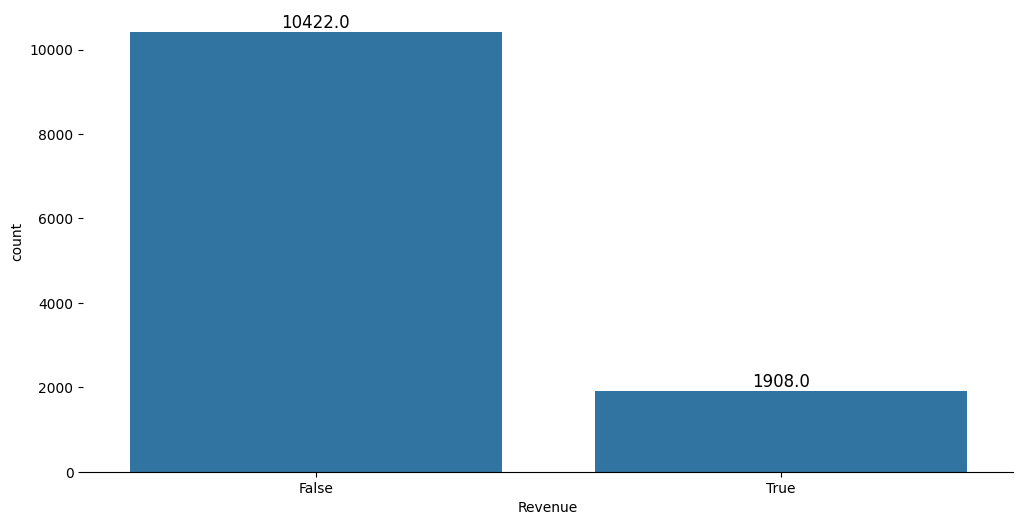



Percent share for each category:
Revenue
False    84.525547
True     15.474453
Name: proportion, dtype: float64


In [8]:
plot_data_count(df, 'Revenue')

Only 15.47% percent of customers ended up making purchase a or more.
So, the conversion rate is 15.47%

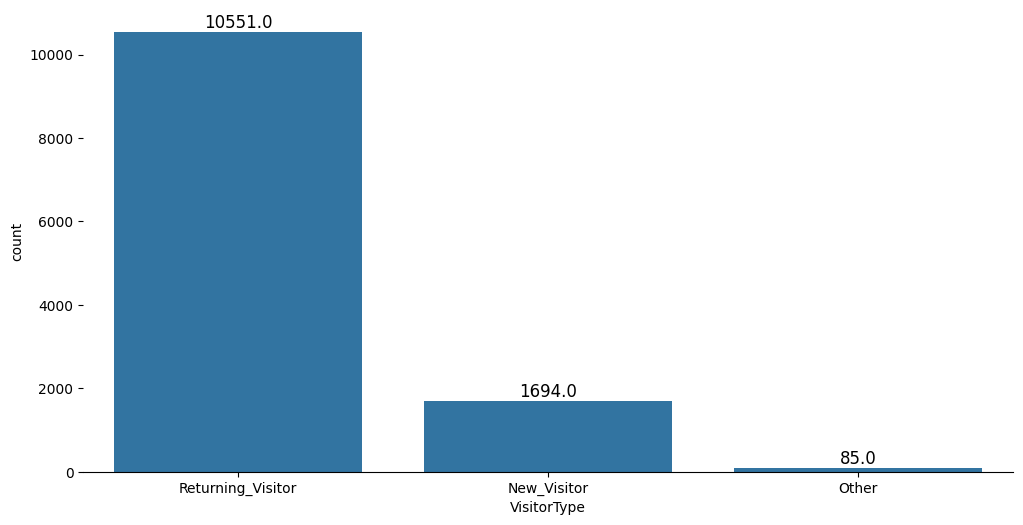



Percent share for each category:
VisitorType
Returning_Visitor    85.571776
New_Visitor          13.738848
Other                 0.689376
Name: proportion, dtype: float64


In [9]:
plot_data_count(df, 'VisitorType')

85% of customers returns back to site, which is a good indication. Meaning that our customers are satisfifying with what they are getting.
13.74% of customers are new customers.

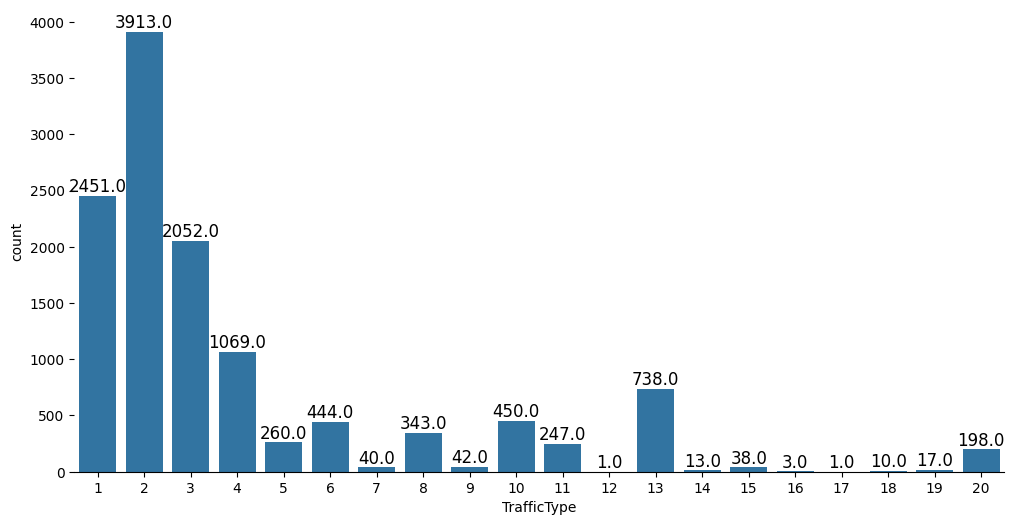



Percent share for each category:
TrafficType
2     31.735604
1     19.878345
3     16.642336
4      8.669911
13     5.985401
10     3.649635
6      3.600973
8      2.781833
5      2.108678
11     2.003244
20     1.605839
9      0.340633
7      0.324412
15     0.308191
19     0.137875
14     0.105434
18     0.081103
16     0.024331
12     0.008110
17     0.008110
Name: proportion, dtype: float64


In [10]:
plot_data_count(df, 'TrafficType')

Most of our visitors are coming from traffic type 2 - around 32%
total 83% of visitors coming from 5 major traffic type 1,2,3,4, and 13

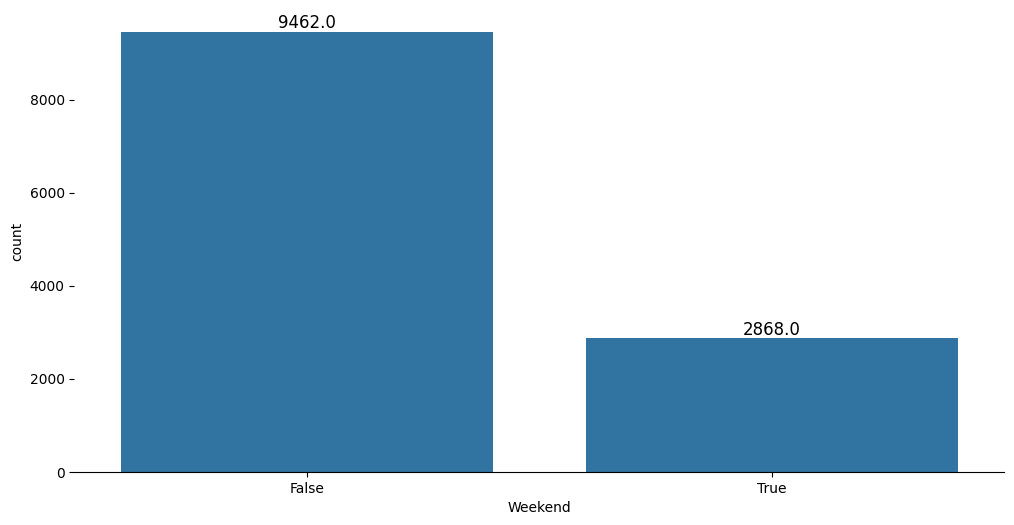



Percent share for each category:
Weekend
False    76.739659
True     23.260341
Name: proportion, dtype: float64


In [11]:
plot_data_count(df, 'Weekend')

More visitors visit our site during weekdays than weekends

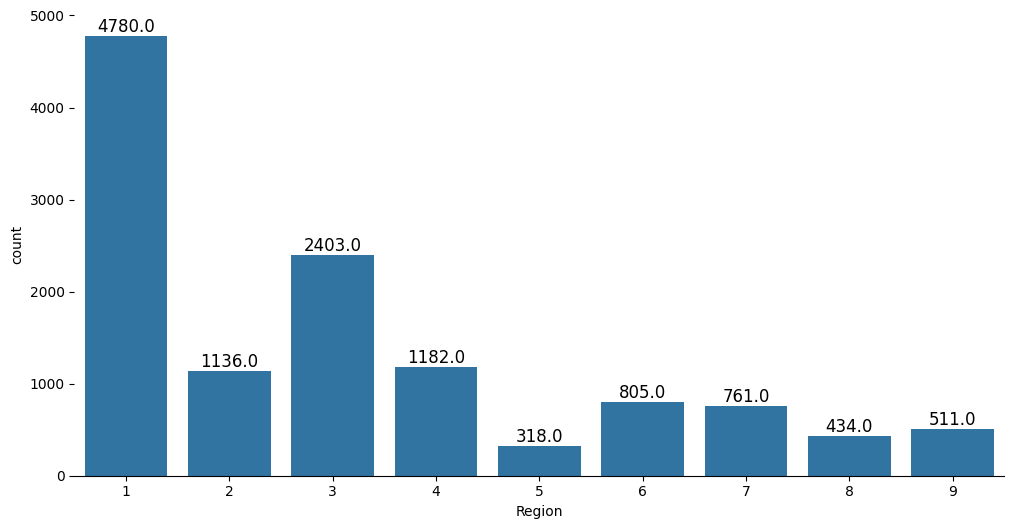



Percent share for each category:
Region
1    38.767234
3    19.489051
4     9.586375
2     9.213301
6     6.528792
7     6.171938
9     4.144363
8     3.519870
5     2.579075
Name: proportion, dtype: float64


In [12]:
plot_data_count(df, 'Region')

Around 39% of visitors come from region one followed by 19.5% from region 3

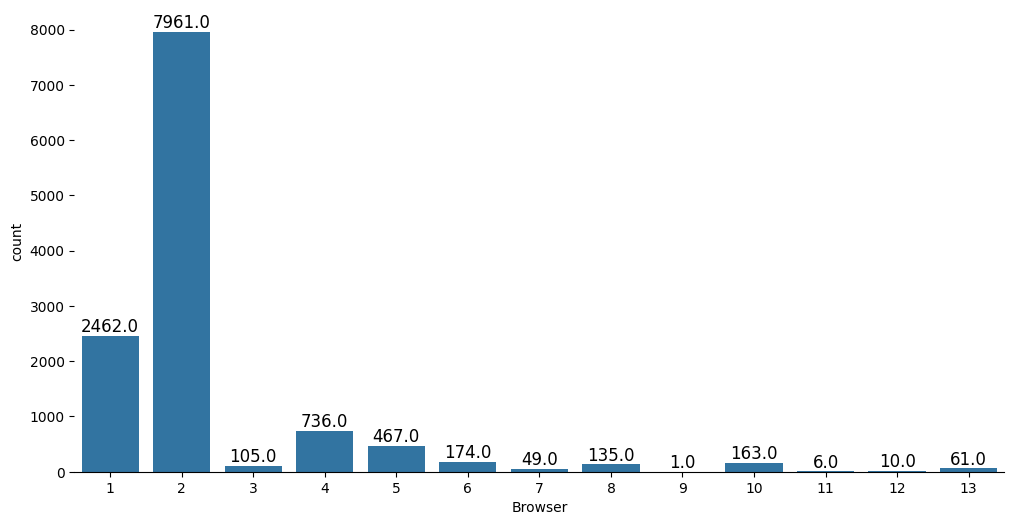



Percent share for each category:
Browser
2     64.566099
1     19.967559
4      5.969181
5      3.787510
6      1.411192
10     1.321979
8      1.094891
3      0.851582
13     0.494728
7      0.397405
12     0.081103
11     0.048662
9      0.008110
Name: proportion, dtype: float64


In [13]:
plot_data_count(df, 'Browser')

64.5% percent of visitors are coming from browser 2 followed by 20% from browser 1.

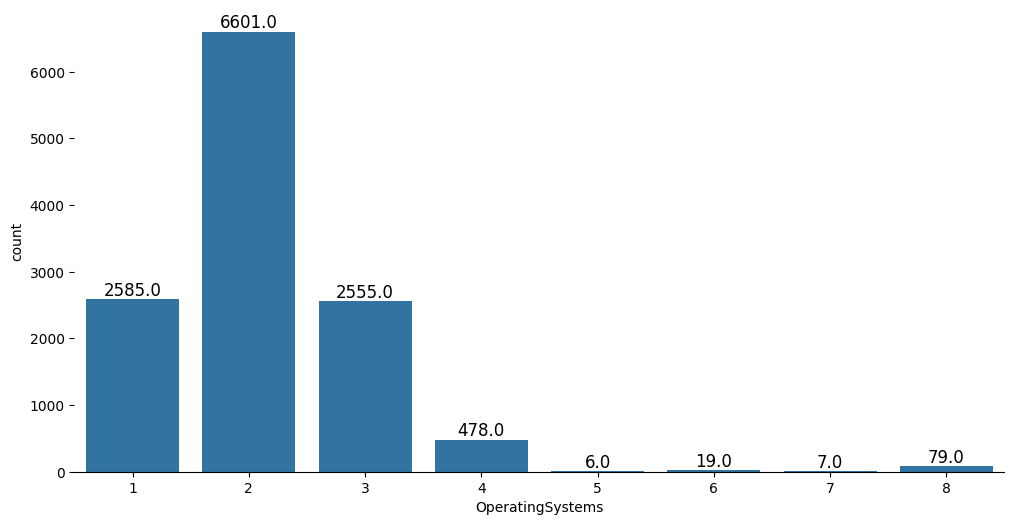



Percent share for each category:
OperatingSystems
2    53.536091
1    20.965126
3    20.721817
4     3.876723
8     0.640714
6     0.154096
7     0.056772
5     0.048662
Name: proportion, dtype: float64


In [14]:
plot_data_count(df, 'OperatingSystems')

More than 50% of visitors are using operating system 2.
Around 95% of visitors are coming from major three operating systems - os 2 (53.5%), os 1 (21%), os 3 (21%)

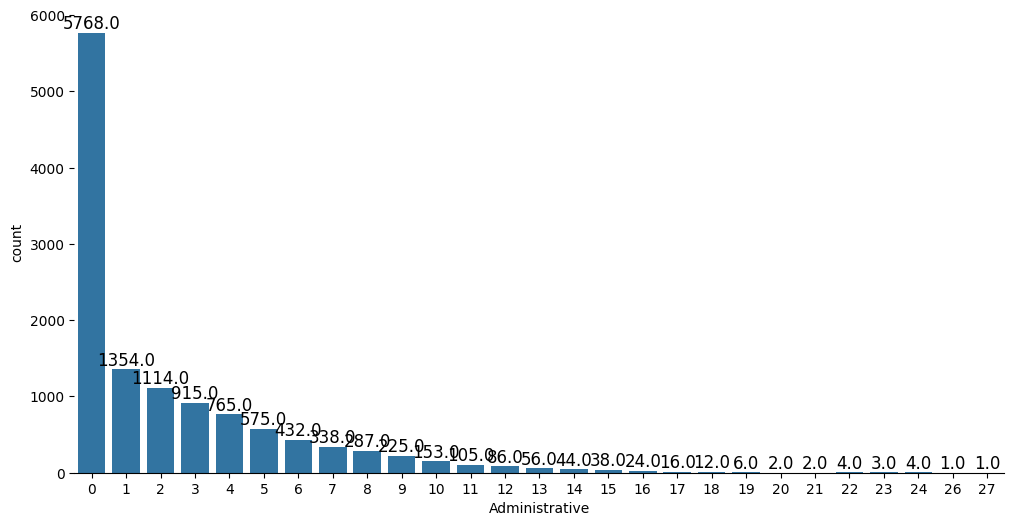



Percent share for each category:
Administrative
0     46.780211
1     10.981346
2      9.034874
3      7.420925
4      6.204380
5      4.663423
6      3.503650
7      2.741281
8      2.327656
9      1.824818
10     1.240876
11     0.851582
12     0.697486
13     0.454177
14     0.356853
15     0.308191
16     0.194647
17     0.129765
18     0.097324
19     0.048662
24     0.032441
22     0.032441
23     0.024331
21     0.016221
20     0.016221
27     0.008110
26     0.008110
Name: proportion, dtype: float64


In [15]:
plot_data_count(df, 'Administrative')

users tend to visit page 0 the most often.

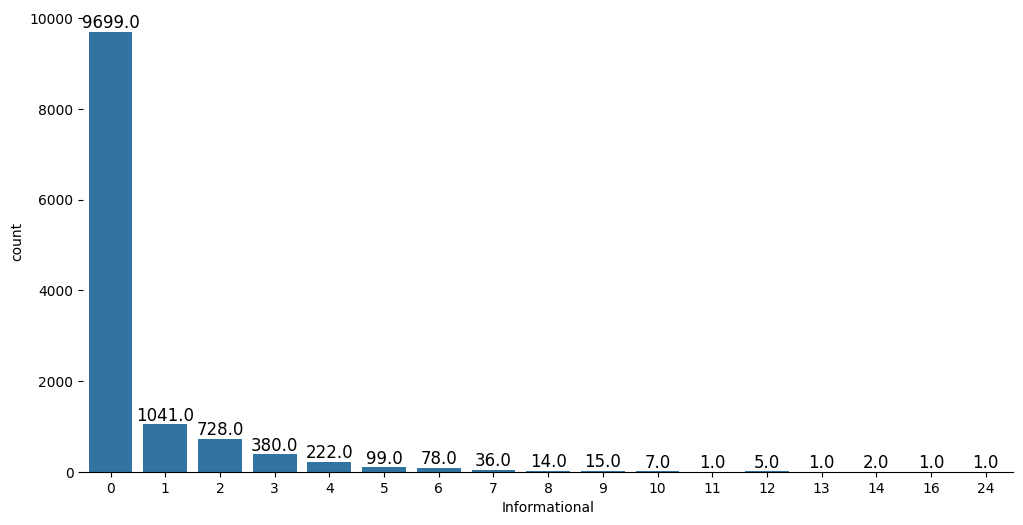



Percent share for each category:
Informational
0     78.661800
1      8.442822
2      5.904298
3      3.081914
4      1.800487
5      0.802920
6      0.632603
7      0.291971
9      0.121655
8      0.113544
10     0.056772
12     0.040552
14     0.016221
16     0.008110
11     0.008110
24     0.008110
13     0.008110
Name: proportion, dtype: float64


In [16]:
plot_data_count(df, 'Informational')

we can see that Information page 0 has the highest number of visitors.

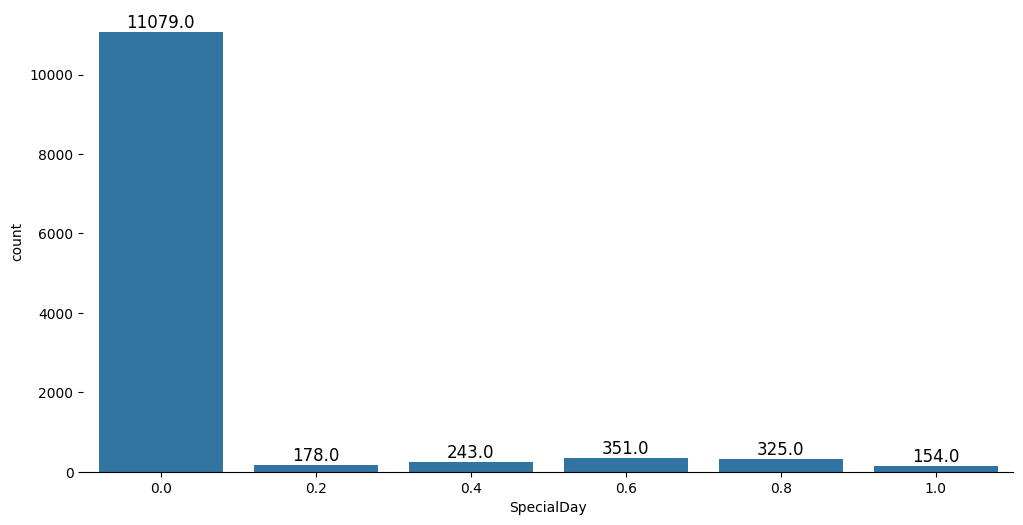



Percent share for each category:
SpecialDay
0.0    89.854015
0.6     2.846715
0.8     2.635848
0.4     1.970803
0.2     1.443633
1.0     1.248986
Name: proportion, dtype: float64


In [17]:
plot_data_count(df, 'SpecialDay')

we can see that special days have no impact on the number of visitors to our website.

Distribution Plots¶

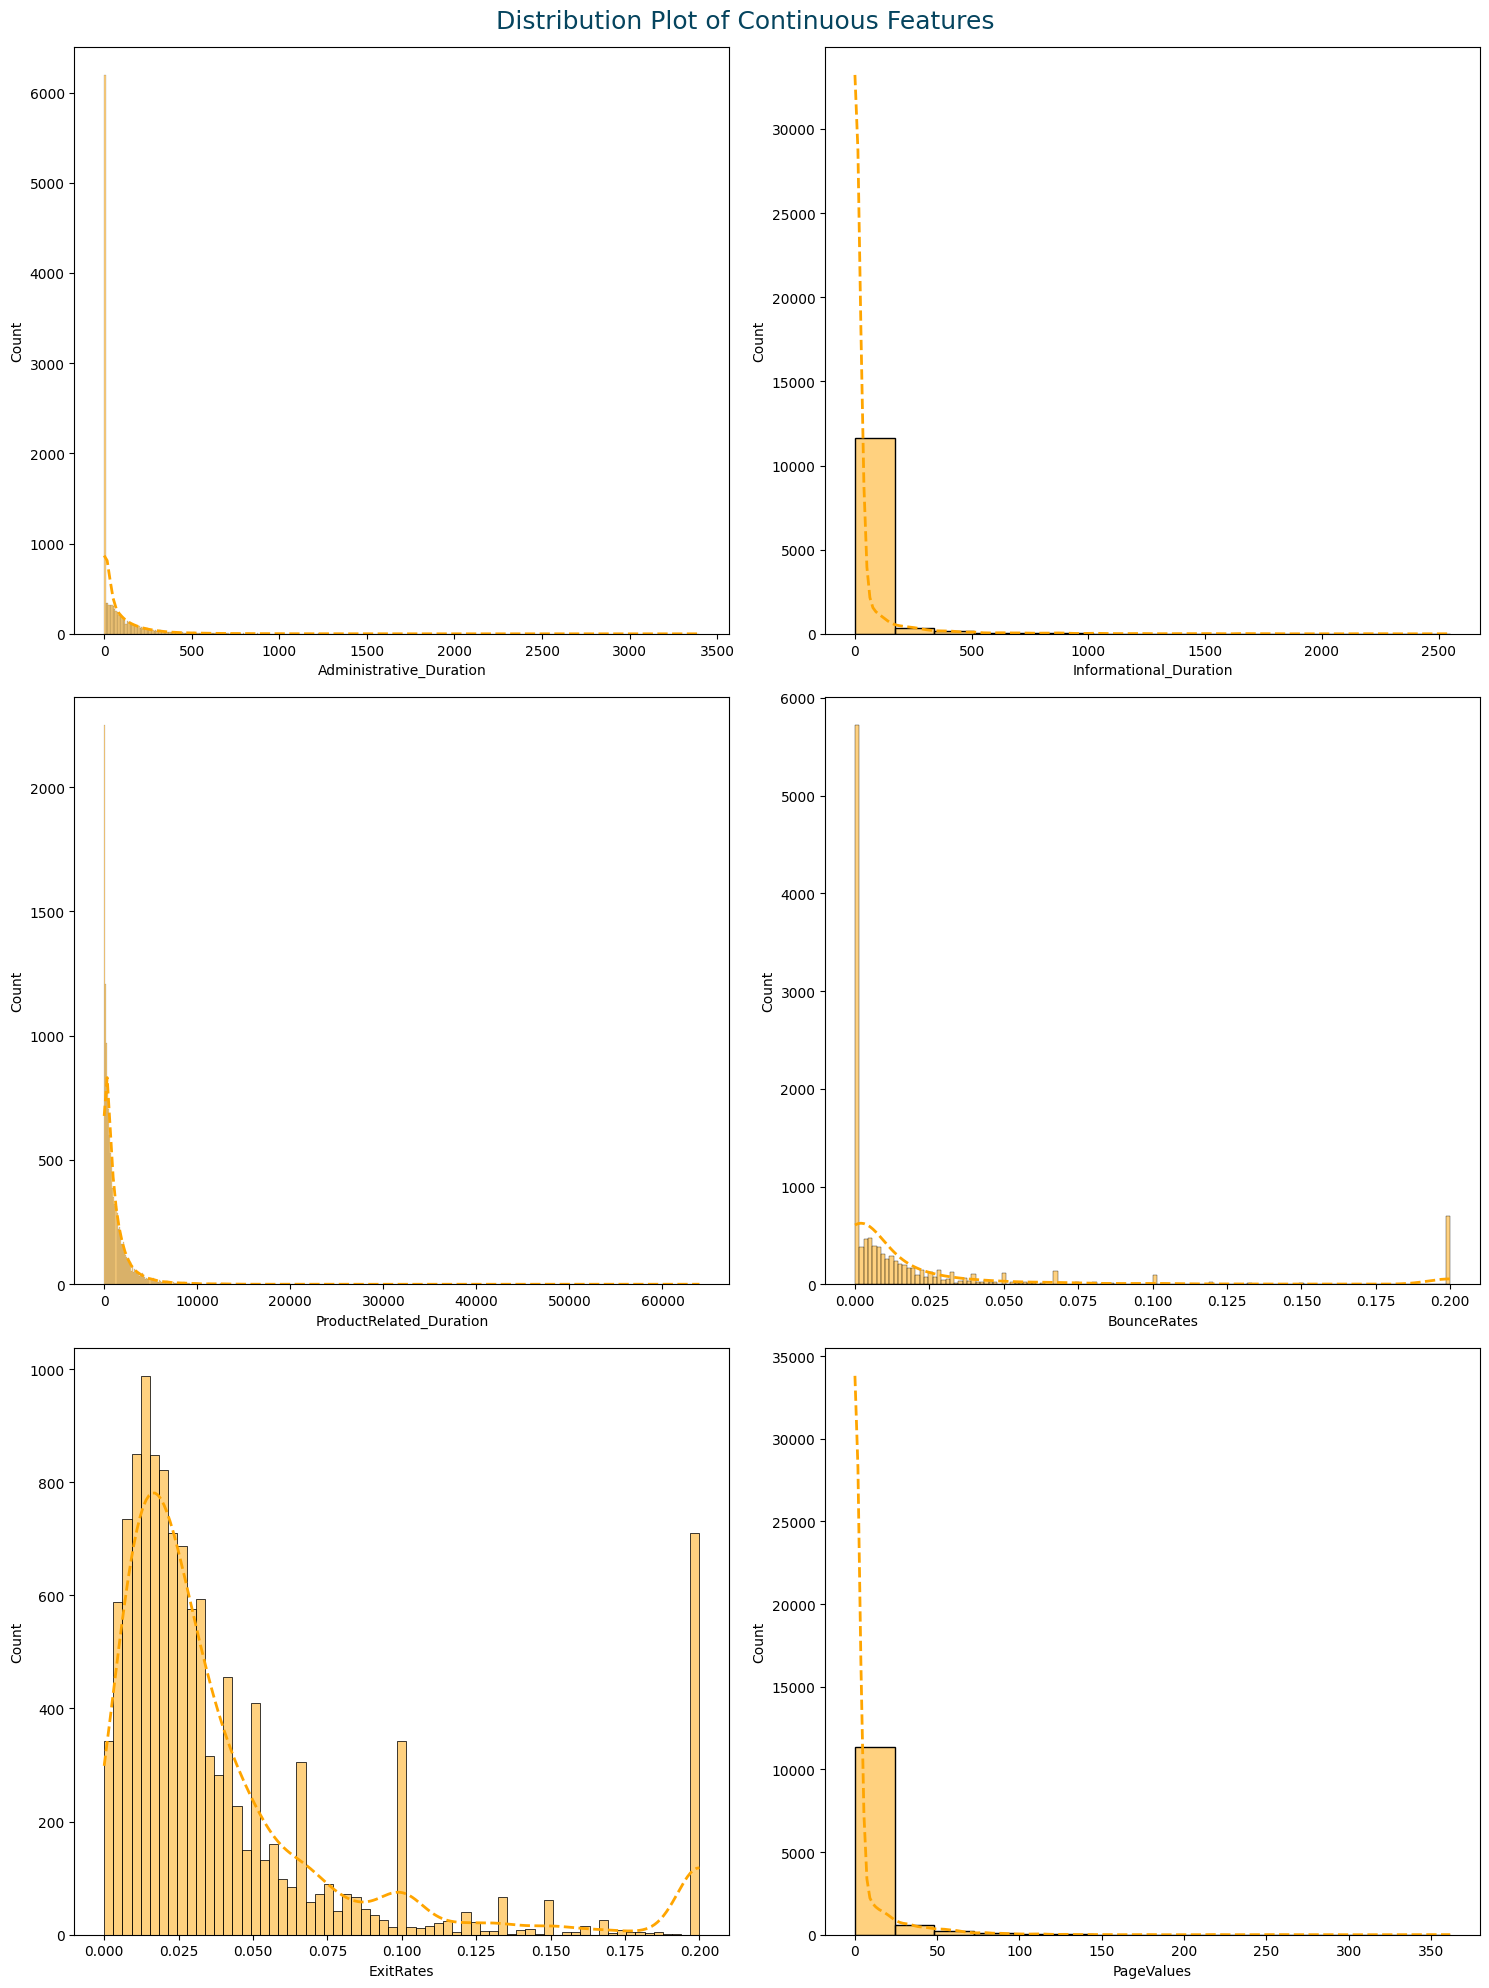

In [18]:
continuous_features = ['Administrative_Duration',
                       'Informational_Duration',
                       'ProductRelated_Duration',
                       'BounceRates',
                       'ExitRates',
                       'PageValues']

fig, axs = plt.subplots(nrows=3, ncols=2, figsize=(15,20))
axs = np.ravel(axs)
for i, col in enumerate(continuous_features):
    plt.sca(axs[i])
    sns.histplot(data=df, x=col, kde=True, line_kws={'lw':2, 'ls':'--'}, color='orange')

plt.suptitle("Distribution Plot of Continuous Features", fontsize=18, color='#05445E', va='bottom')
plt.tight_layout()
plt.show()


In [19]:
df[continuous_features].describe()

,Administrative_Duration,Informational_Duration,ProductRelated_Duration,BounceRates,ExitRates,PageValues
count,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000
mean,80.818611,34.472398,1194.746220,0.022191,0.043073,5.889258
std,176.779107,140.749294,1913.669288,0.048488,0.048597,18.568437
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,184.137500,0.000000,0.014286,0.000000
50%,7.500000,0.000000,598.936905,0.003112,0.025156,0.000000
75%,93.256250,0.000000,1464.157214,0.016813,0.050000,0.000000
max,3398.750000,2549.375000,63973.522230,0.200000,0.200000,361.763742


Bivariate Analysis

In [20]:
def chi_squared_test_result(col):

    x = df.groupby(['Revenue', col])[col].count().unstack(1).fillna(0).astype('int')
    test_results = stats.chi2_contingency(x.values)
    pval = test_results[1]
    if pval<0.05:
        print(f"P-value: {pval:.4f} - \n\nIt means we can **reject the null hypothesis (at 95% CI)** and conclude that **Revenue is dependent on {col}.**")
    else:
        print(f"P-value: {pval:.4f} - \n\nFailed to reject null hypothesis. Both **Revenue is independent on {col}.**")

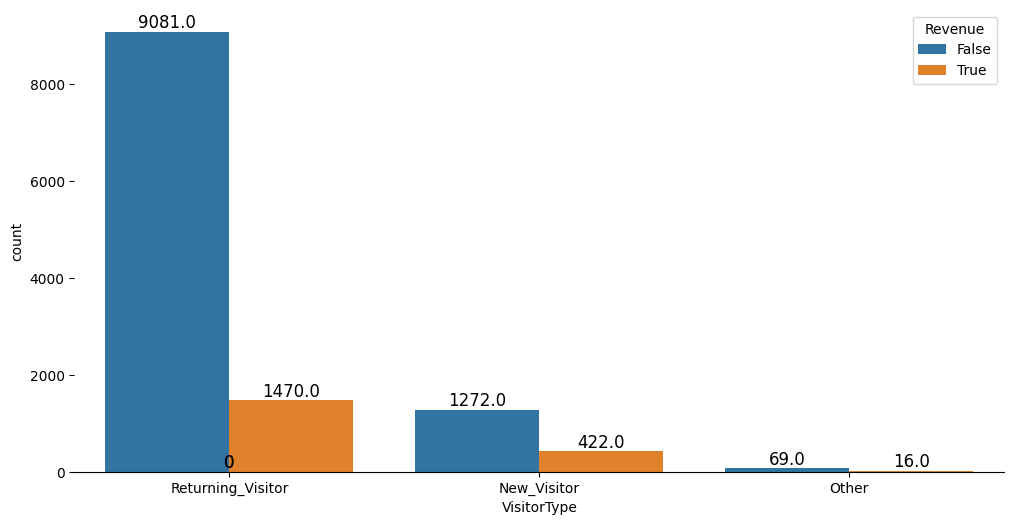

In [21]:
## Visitor type
plot_data_count(df, col='VisitorType', return_pct_share=False, hue='Revenue')

more revenue conversion happens for returning customers than new customers.
we need to give incentives to new customers to make purchase with us.
First let's check whether Revenue is independent or dependent on visitor type by chi-squared test

In [22]:
chi_squared_test_result('VisitorType')

P-value: 0.0000 - 

It means we can **reject the null hypothesis (at 95% CI)** and conclude that **Revenue is dependent on VisitorType.**


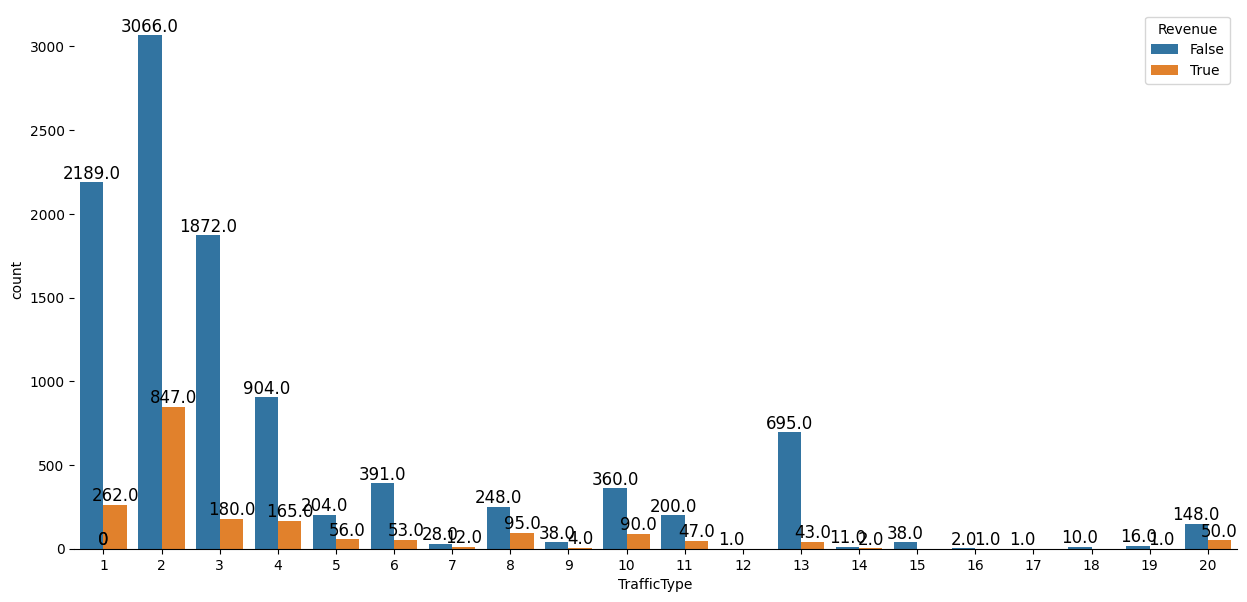

P-value: 0.0000 - 

It means we can **reject the null hypothesis (at 95% CI)** and conclude that **Revenue is dependent on TrafficType.**


In [23]:
## Revenue and Traffic Type

plot_data_count(df, col='TrafficType', return_pct_share=False, hue='Revenue', figsize=(15,7))

# chi-squared test
chi_squared_test_result('TrafficType')

We can see that more revenue conversion happens for web traffic generated from source 2. Even though source 13 generated a considerable amount of web traffic, conversion is very low compared to others.

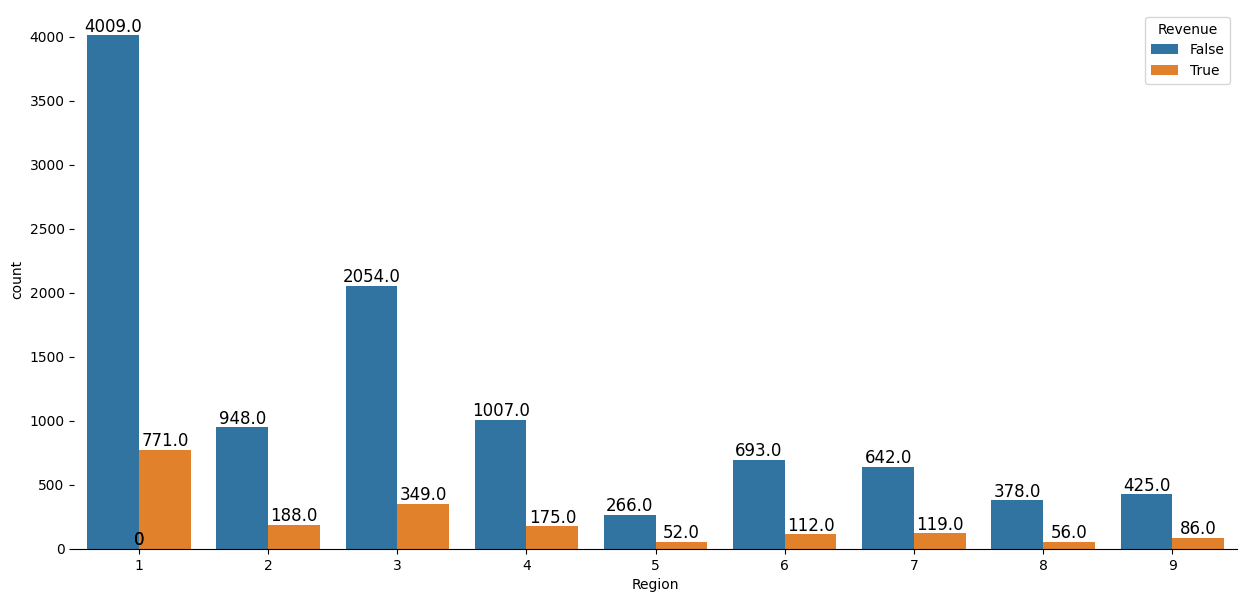

P-value: 0.3214 - 

Failed to reject null hypothesis. Both **Revenue is independent on Region.**


In [24]:
## Revenue and Region

plot_data_count(df, col='Region', return_pct_share=False, hue='Revenue', figsize=(15,7))

# chi-squared test
chi_squared_test_result('Region')

Region 1 accounts for most sales, and region 3 the second most. With this information, we can plan our marketing and supply chain activities in a better way. For example, we might propose building a warehouse specifically catering to the needs of region 1 to increase delivery rates and ensure that products in the highest demand are always well stocked.

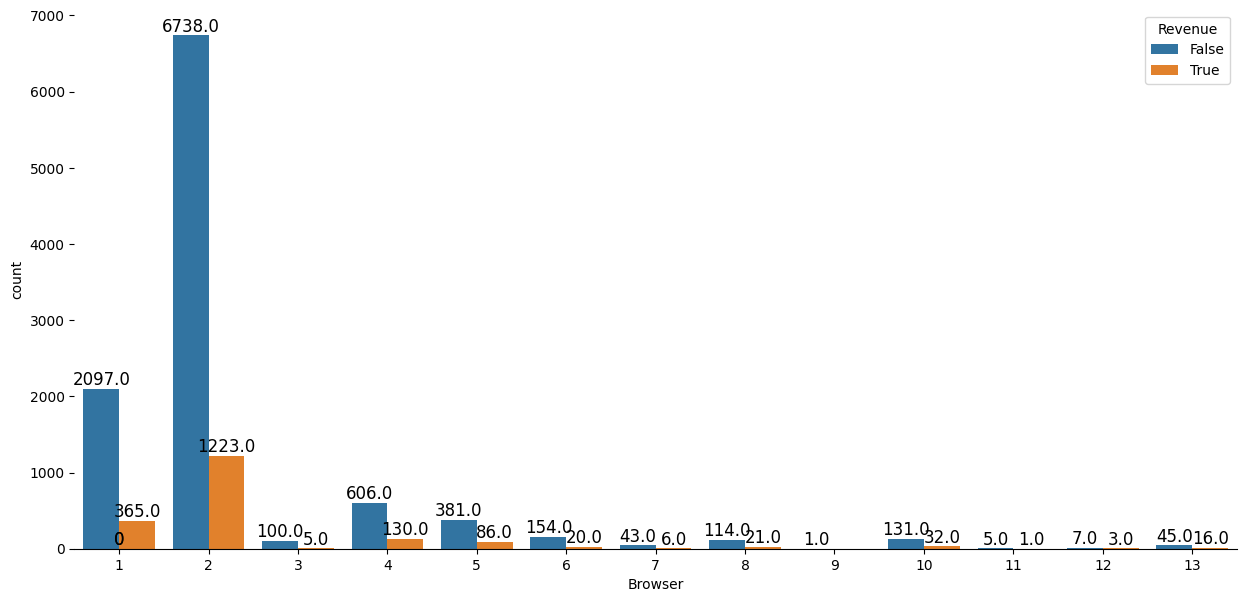

P-value: 0.0061 - 

It means we can **reject the null hypothesis (at 95% CI)** and conclude that **Revenue is dependent on Browser.**


In [25]:
## Revenue and Browser

plot_data_count(df, col='Browser', return_pct_share=False, hue='Revenue', figsize=(15,7))

# chi-squared test
chi_squared_test_result('Browser')

more revenue-generating transactions have been performed from Browser 2. Even though Browser 1 creates a considerable number of sessions, the conversion rate is low. This is something we need to investigate further.

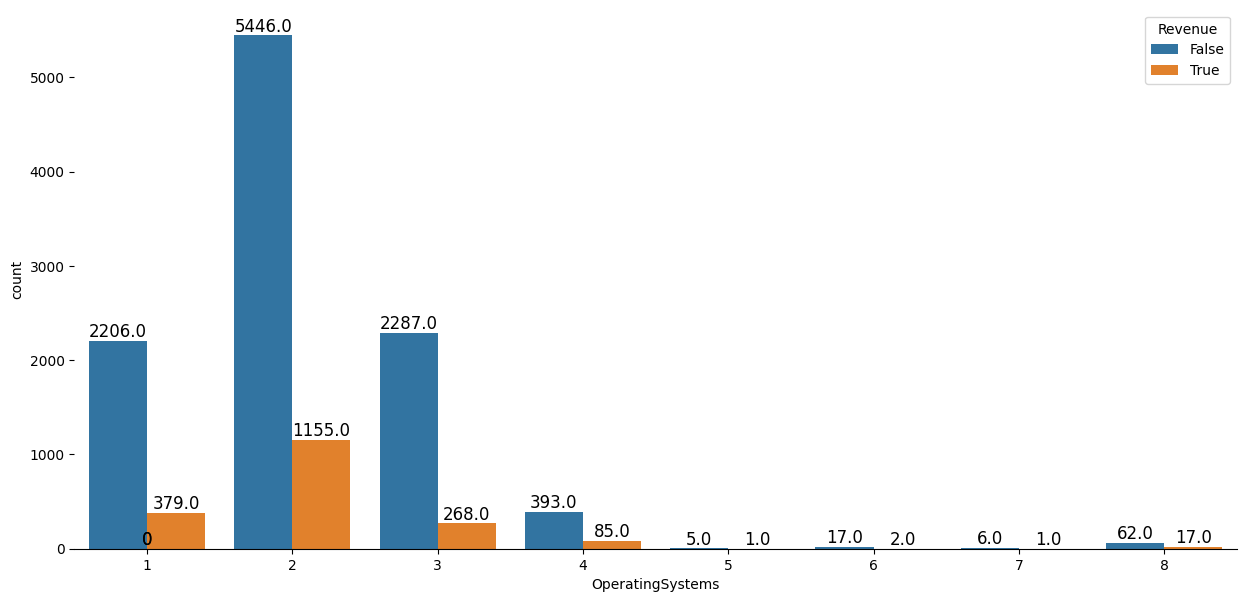

P-value: 0.0000 - 

It means we can **reject the null hypothesis (at 95% CI)** and conclude that **Revenue is dependent on OperatingSystems.**


In [26]:
## Revenue and OperatingSystems

plot_data_count(df, col='OperatingSystems', return_pct_share=False, hue='Revenue', figsize=(15,7))

# chi-squared test
chi_squared_test_result('OperatingSystems')

more revenue-generating transactions happened with OS 2 than the other types.

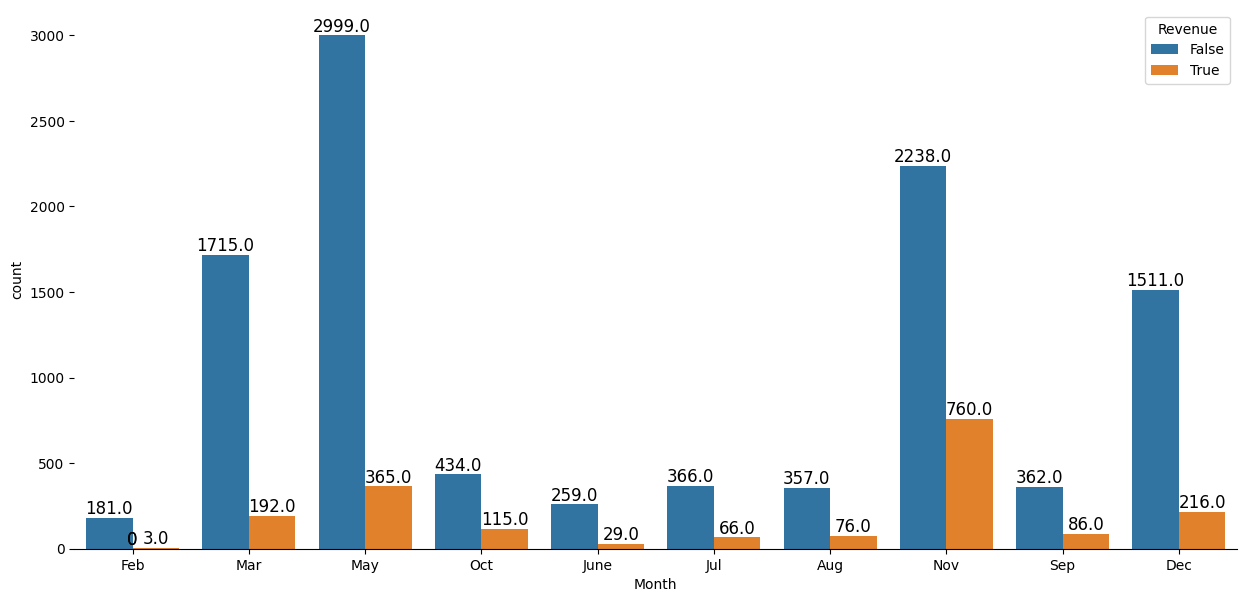

P-value: 0.0000 - 

It means we can **reject the null hypothesis (at 95% CI)** and conclude that **Revenue is dependent on Month.**


In [27]:
## Revenue and Month

plot_data_count(df, col='Month', return_pct_share=False, hue='Revenue', figsize=(15,7))

# chi-squared test
chi_squared_test_result('Month')

Website visitors may be high in May, but we can observe from the preceding bar plot that a greater number of purchases were made in the month of November.

In [28]:
discrete_features = ['Administrative', 'Informational',
                     'ProductRelated', 'Month',
                     'OperatingSystems', 'Browser',
                     'Region', 'TrafficType',
                     'VisitorType', 'Weekend']

chi_squared_df = pd.DataFrame(columns=['feature', 'pval', 'dependent'])

for i, col in enumerate(discrete_features):
    x = df.groupby(['Revenue', col])[col].count().unstack(1).fillna(0).astype('int')
    res = stats.chi2_contingency(x.values)
    pval = res[1]

    if pval < 0.05:
        dependent = 'Yes'
    else:
        dependent = 'No'

    chi_squared_df.loc[i] = [col, round(pval,3), dependent]

chi_squared_df

,feature,pval,dependent
0,Administrative,0.000,Yes
1,Informational,0.000,Yes
2,ProductRelated,0.000,Yes
3,Month,0.000,Yes
4,OperatingSystems,0.000,Yes
5,Browser,0.006,Yes
6,Region,0.321,No
7,TrafficType,0.000,Yes
8,VisitorType,0.000,Yes
9,Weekend,0.001,Yes


From chi-squared test we got that except Region all other discrete features are dependent on Revenue feature.

Violin plots

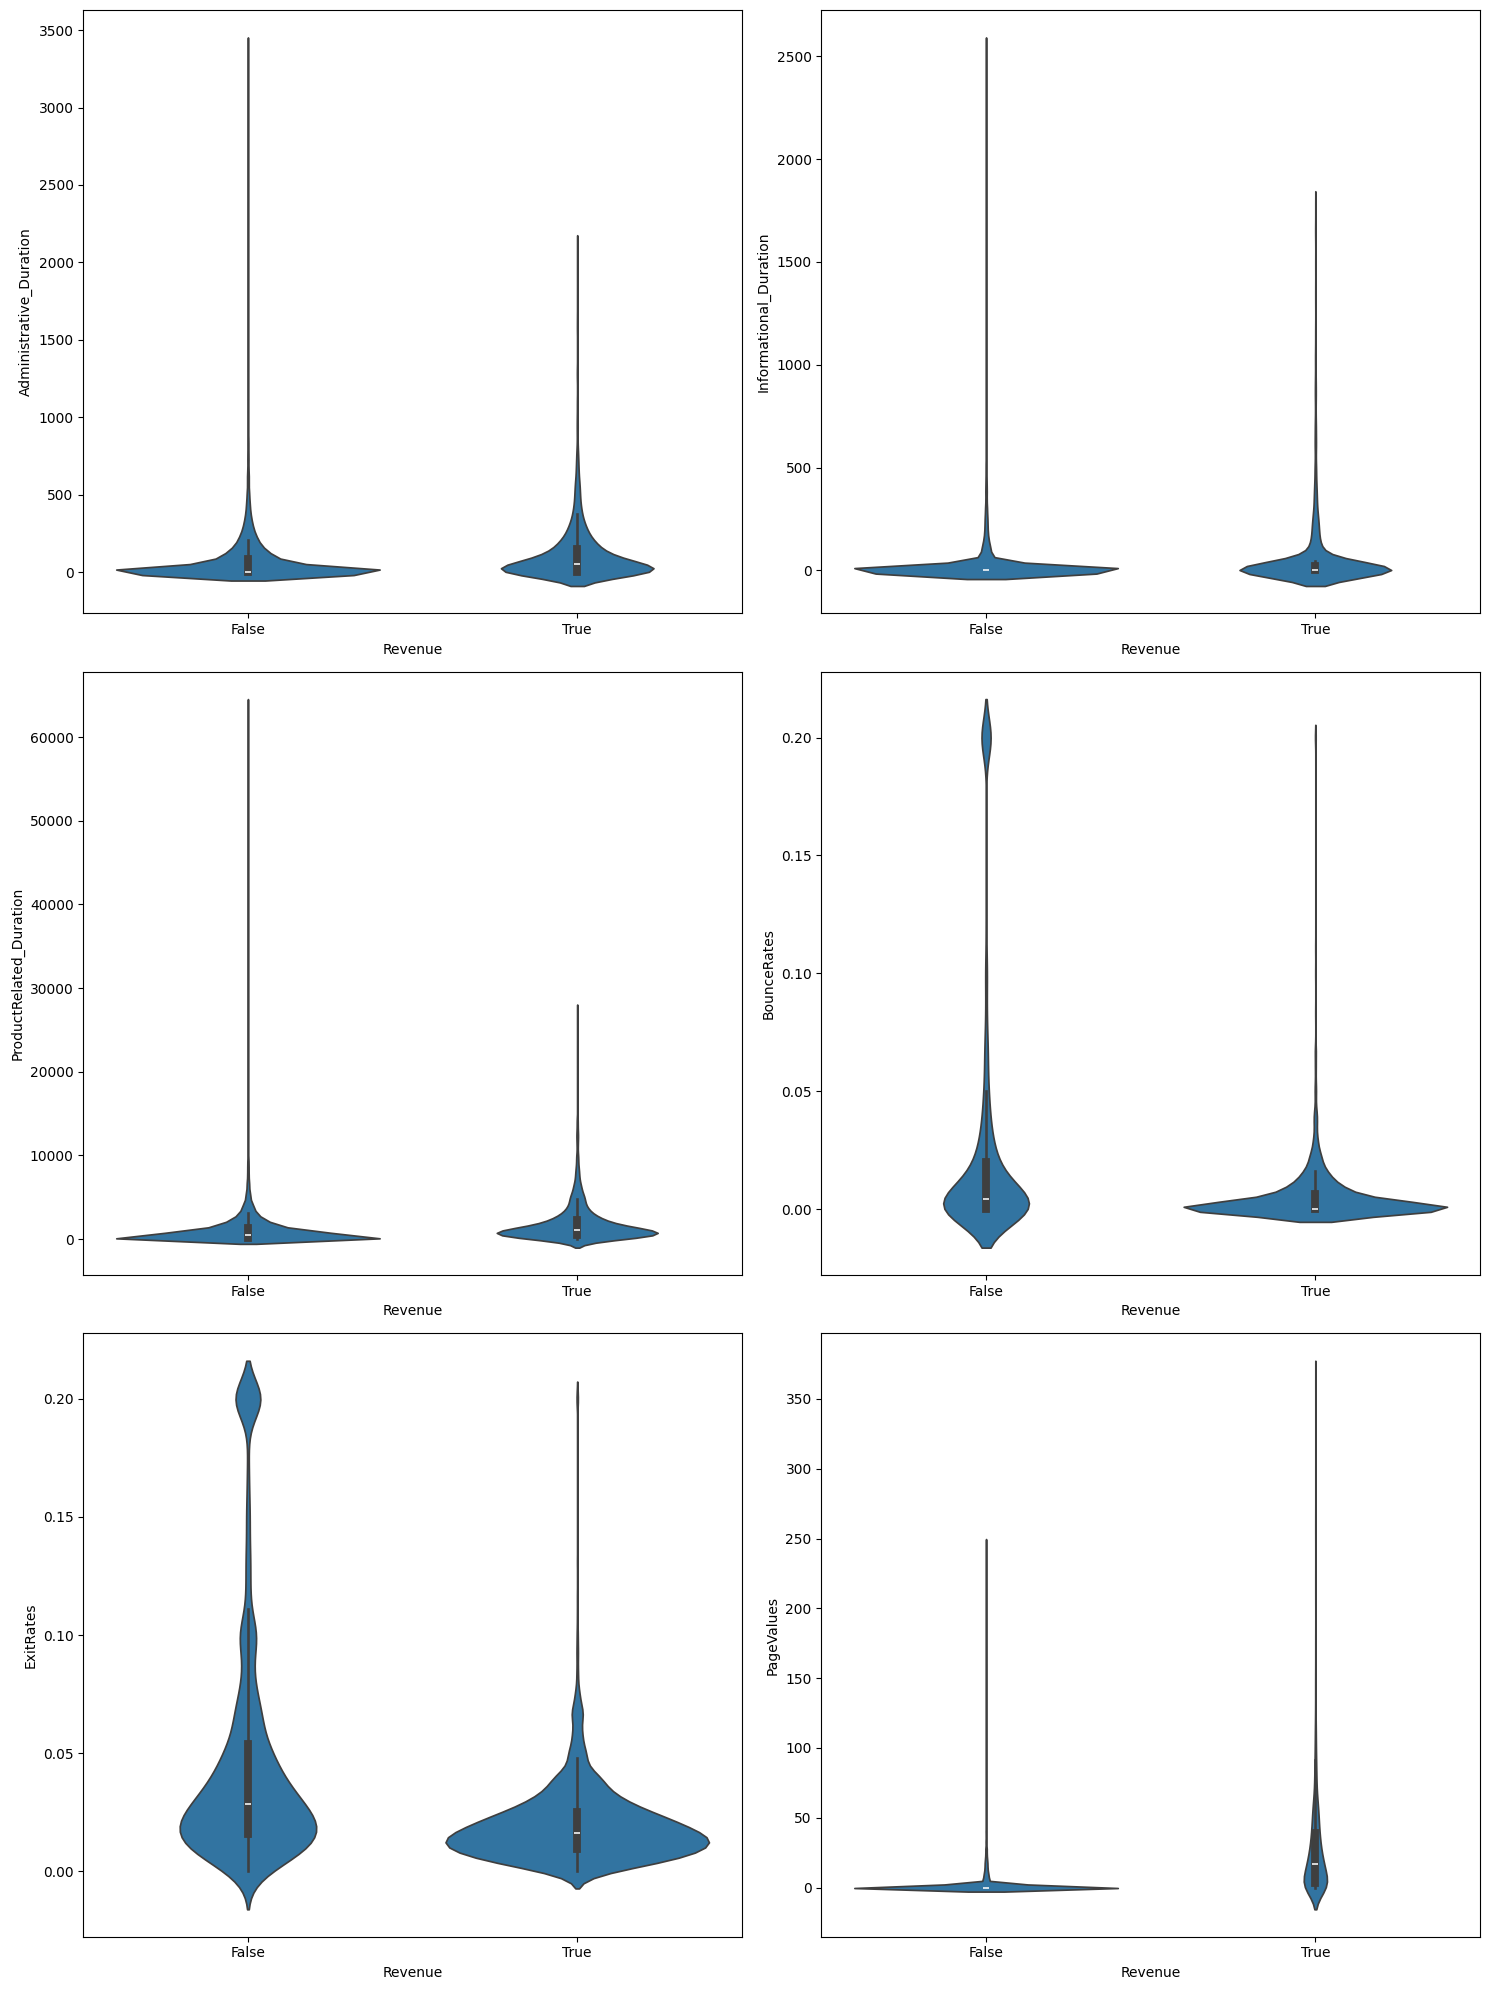

In [29]:
continuous_features

fig, axs = plt.subplots(nrows=3, ncols=2, figsize=(15,20))
axs = np.ravel(axs)

for i, col in enumerate(continuous_features):
    plt.sca(axs[i])
    sns.violinplot(data=df, x='Revenue', y=col)

plt.tight_layout()
plt.show()

In [30]:
test_df = pd.DataFrame(columns=['col', 'mean_revenue_true', 'mean_revenue_false', 'ttest_pval', 'ks_test_pval'])

for i, col in enumerate(continuous_features):
    revenue_true = df[col][df.Revenue==True]
    revenue_false = df[col][df.Revenue==False]

    ttest_res = stats.ttest_ind(revenue_true, revenue_false)
    ks_test = stats.ks_2samp(revenue_true, revenue_false)

    test_df.loc[i] = [col, revenue_true.mean(), revenue_false.mean(), round(ttest_res[1], 3), round(ks_test[1], 3)]


test_df

,col,mean_revenue_true,mean_revenue_false,ttest_pval,ks_test_pval
0,Administrative_Duration,119.483244,73.740111,0.0,0.0
1,Informational_Duration,57.611427,30.236237,0.0,0.0
2,ProductRelated_Duration,1876.209615,1069.987809,0.0,0.0
3,BounceRates,0.005117,0.025317,0.0,0.0
4,ExitRates,0.019555,0.047378,0.0,0.0
5,PageValues,27.264518,1.975998,0.0,0.0


Google Analytics Features¶

In [31]:
google_analytics_features = ['BounceRates', 'ExitRates', 'PageValues']


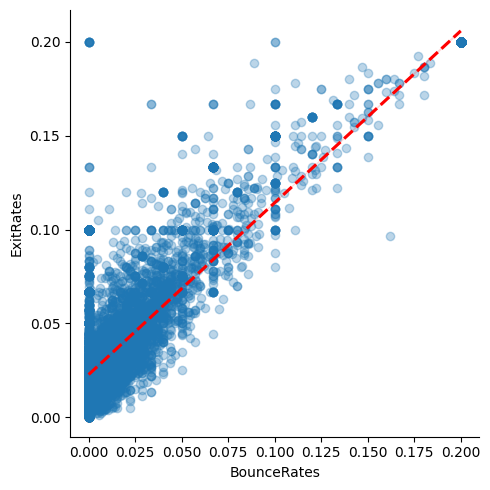

In [32]:
# Bounce Rate vs Exit Rate

sns.lmplot(x="BounceRates", y="ExitRates", data=df,
           scatter_kws={'alpha':0.3},
           line_kws={'color':'red', 'ls':'--'})
plt.show()

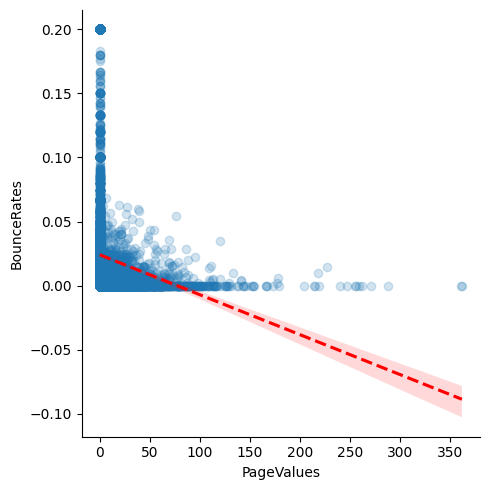

In [33]:
# Page Value versus Bounce Rate

sns.lmplot(x="PageValues", y="BounceRates" ,
           data=df, scatter_kws={'alpha':0.2},
          line_kws={'color':'red', 'ls':'--'})
plt.show()

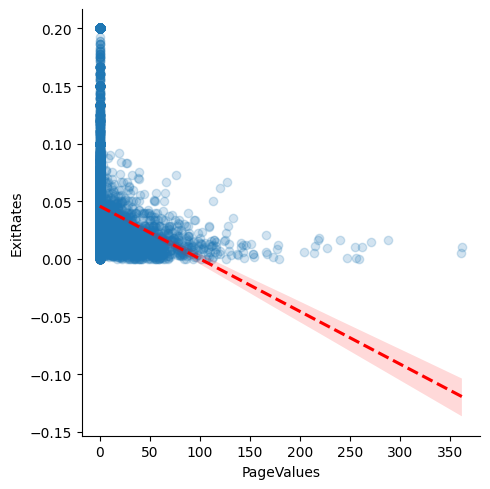

In [34]:
# Page Value versus Exit Rate

sns.lmplot(x="PageValues", y="ExitRates" ,
           data=df, scatter_kws={'alpha':0.2},
           line_kws={'color':'red', 'ls':'--'})
plt.show()

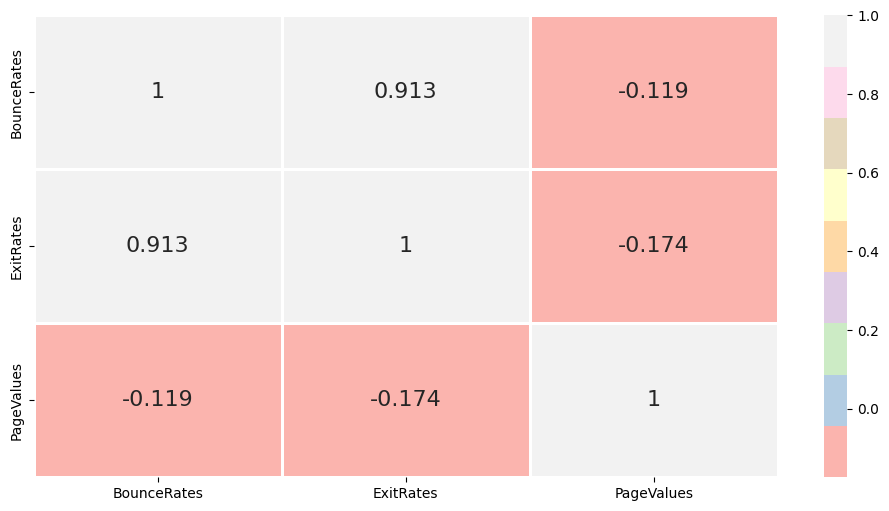

In [35]:
corr_mat = df[google_analytics_features].corr()
sns.heatmap(corr_mat, annot=True,annot_kws={'fontsize':16}, fmt='.3g', linewidths=2, cmap='Pastel1')
plt.show()

Type of Pages

In [36]:
type_of_pages = ['Administrative', 'Informational', 'ProductRelated']


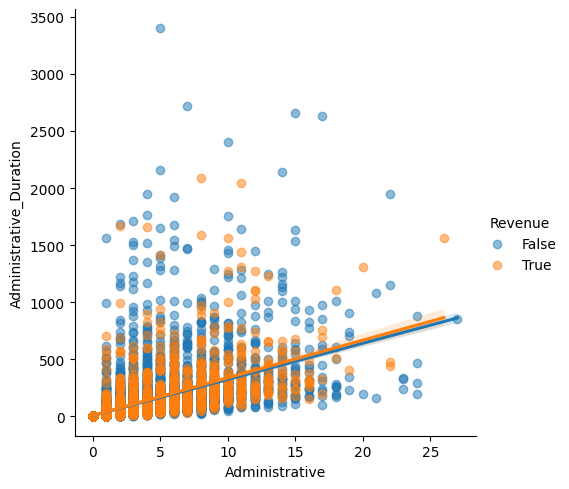

In [37]:
# Impact of Administrative Page Views and Administrative Pageview Duration on Revenue

sns.lmplot(x="Administrative", y="Administrative_Duration",
           hue='Revenue', data=df, scatter_kws={'alpha':0.5})
plt.show()

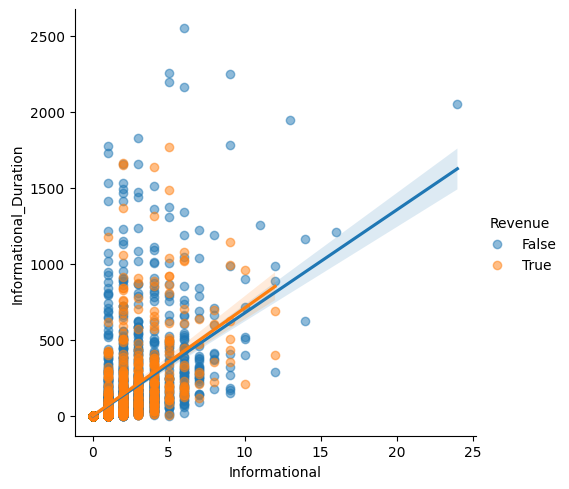

In [38]:
# Impact of Information Page Views and Information Pageview Duration on Revenue

sns.lmplot(x="Informational", y="Informational_Duration",
           hue='Revenue', data=df, scatter_kws={'alpha':0.5})
plt.show()

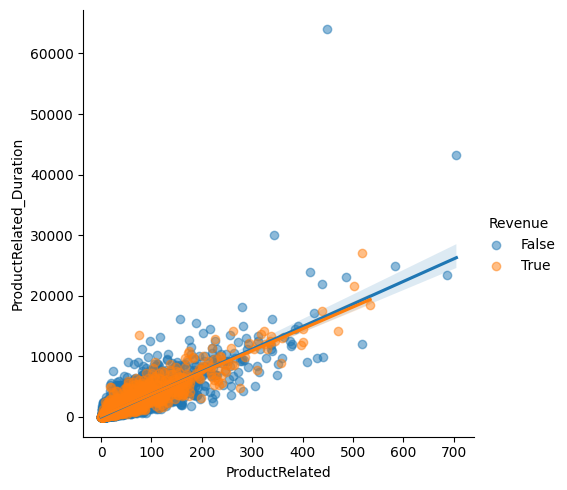

In [39]:
# Impact of ProductRelated Page Views and ProductRelated Pageview Duration on Revenue

sns.lmplot(x="ProductRelated", y="ProductRelated_Duration",
           hue='Revenue', data=df, scatter_kws={'alpha':0.5})
plt.show()

All type of pages and their duration are positively correlated. With an increase in the number of page-views, the page-view duration also increases.
Customers who have made online purchases visited fewer numbers of pages.
This implies that page-views don't have much effect on revenue generation.


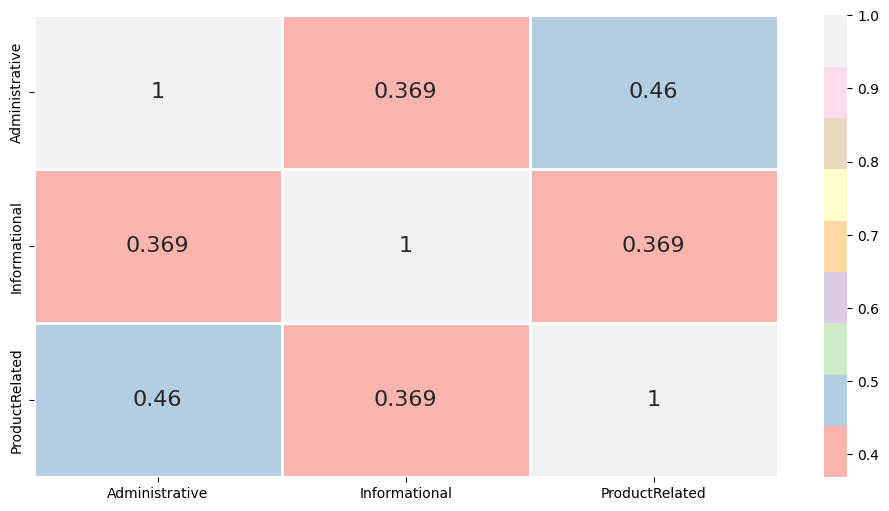

In [40]:
corr_mat = df[type_of_pages].corr(method='spearman')
sns.heatmap(corr_mat, annot=True,annot_kws={'fontsize':16}, fmt='.3g', linewidths=2, cmap='Pastel1')
plt.show()

Clustering

In [41]:
def find_clusters(data, start=1, end=11):
    """
    data: array like
    """
    inertias = []

    for i in range(start,end):
        kmeans = KMeans(n_clusters=i)
        kmeans.fit(X)
        inertias.append(kmeans.inertia_)


    plt.plot(np.arange(start,end), np.array(inertias), color='orange', marker='o')
    plt.xlabel('No. of clusters')
    plt.ylabel('Inertia')
    plt.title("Elbow Curve", fontsize=16)
    plt.show()

In [42]:
def draw_optimal_clusters(data, n_clusters=2, xlabel=None, ylabel=None, title=None):

    kmeans = KMeans(n_clusters=n_clusters)
    kmeans.fit(data)

    y_means = kmeans.predict(X)
    centers = kmeans.cluster_centers_

    plt.scatter(X[y_means==0, 0], X[y_means==0, 1], color='lightblue', label='Uninterested Customers')
    plt.scatter(X[y_means==1, 0], X[y_means==1, 1], color='orange', label='Interested Customers')
    plt.scatter(centers[:,0], centers[:,1], s=100, label='Centers')

    plt.legend()

    plt.title(title, fontsize = 20)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.show()


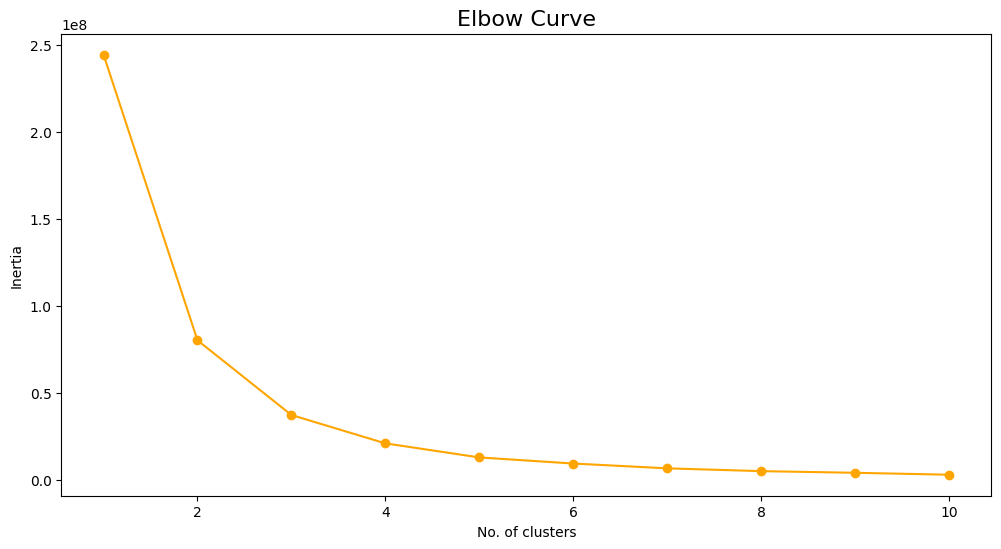

In [44]:
#Informational Duration versus Bounce Rate¶
# Performing K-means Clustering for Informational Duration versus Bounce Rate

X = df.iloc[:, [3, 6]].values

find_clusters(X)

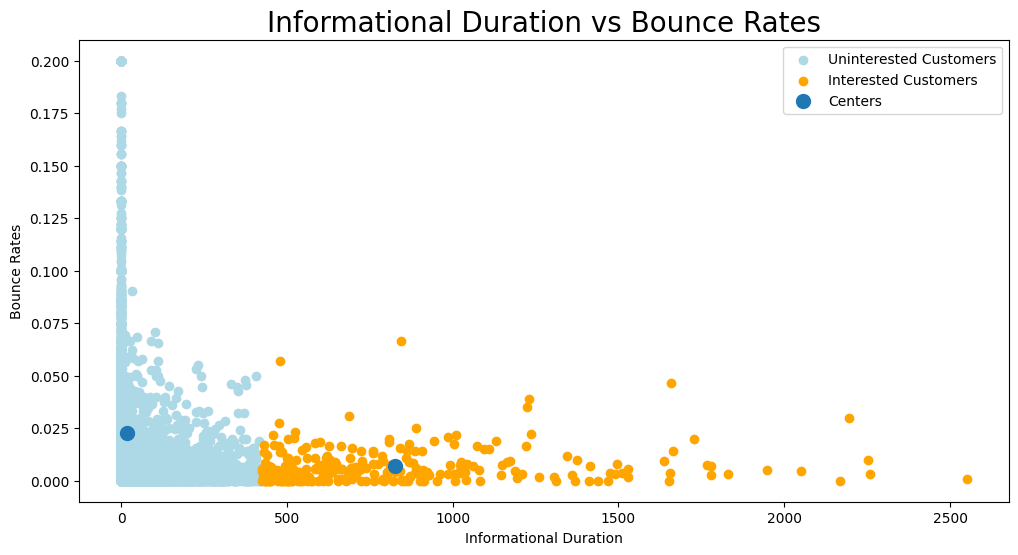

In [45]:
draw_optimal_clusters(X,n_clusters=2, xlabel="Informational Duration",
                      ylabel="Bounce Rates",
                      title="Informational Duration vs Bounce Rates")


Informational Duration versus Exit Rate¶

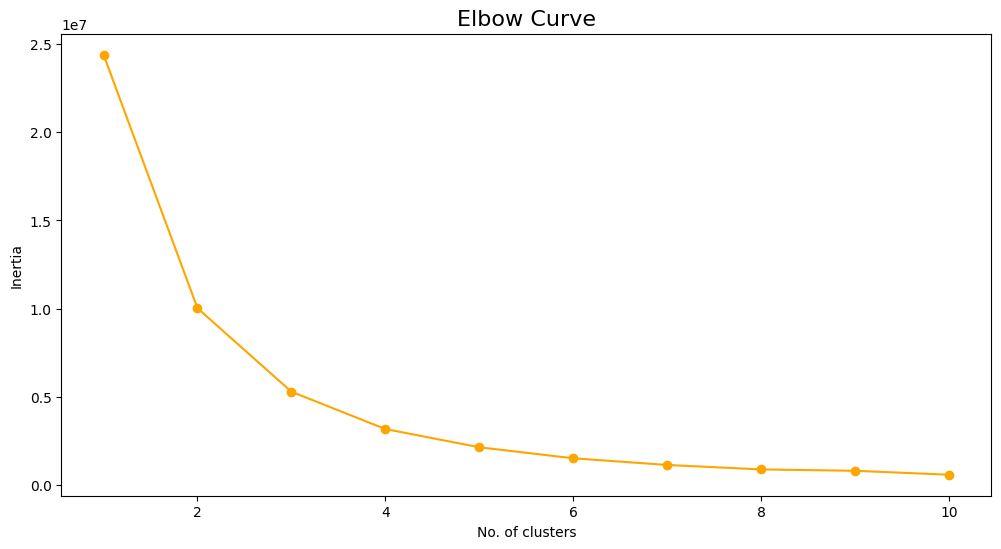

In [46]:
# K-means Clustering for Informational Duration versus Exit Rate

X = df.iloc[:, [4, 7]].values

find_clusters(X)

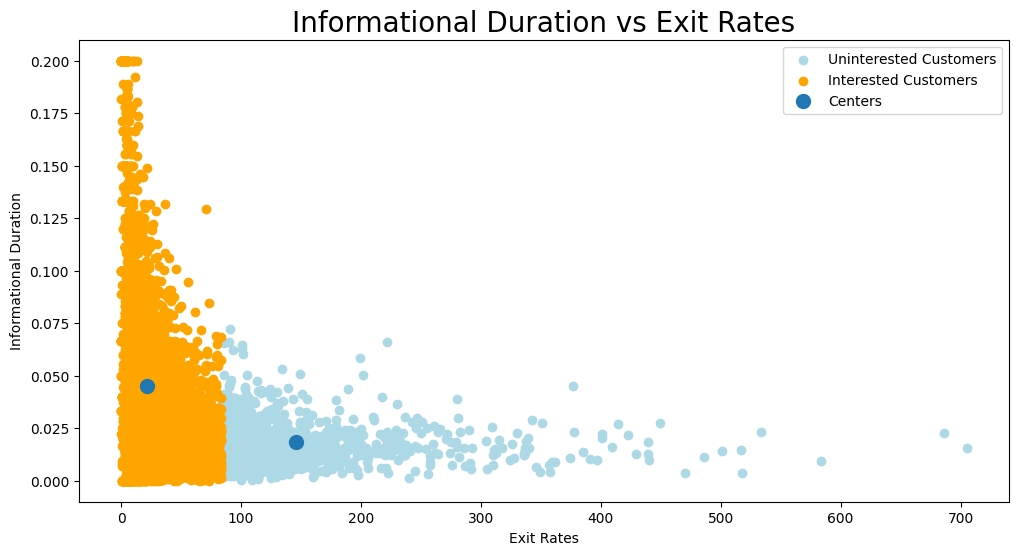

In [47]:
draw_optimal_clusters(X, n_clusters=2, xlabel='Exit Rates',
                      ylabel='Informational Duration',
                      title='Informational Duration vs Exit Rates')

Administrative Duration versus Bounce Rate¶

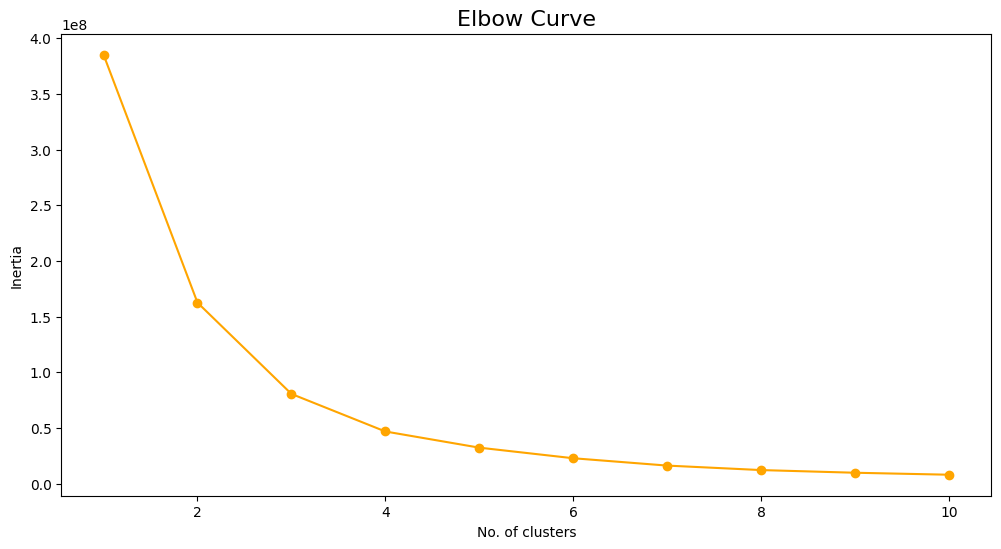

In [48]:
# K-means Clustering for Administrative Duration versus Bounce Rate

X = df.iloc[:, [1, 6]].values

find_clusters(X)

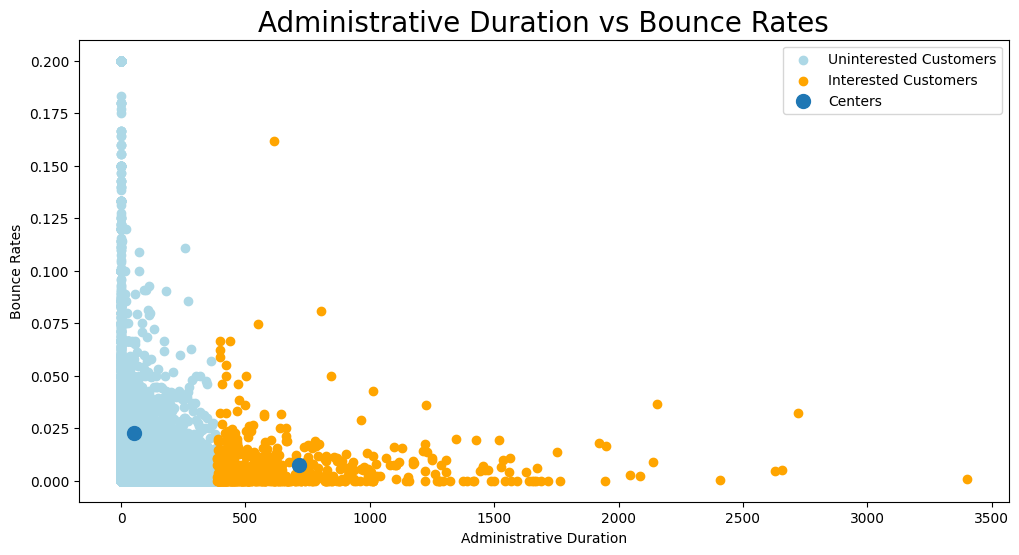

In [49]:
draw_optimal_clusters(X, n_clusters=2, xlabel="Administrative Duration",
                      ylabel="Bounce Rates",
                      title="Administrative Duration vs Bounce Rates")

Administrative Duration versus Exit Rate

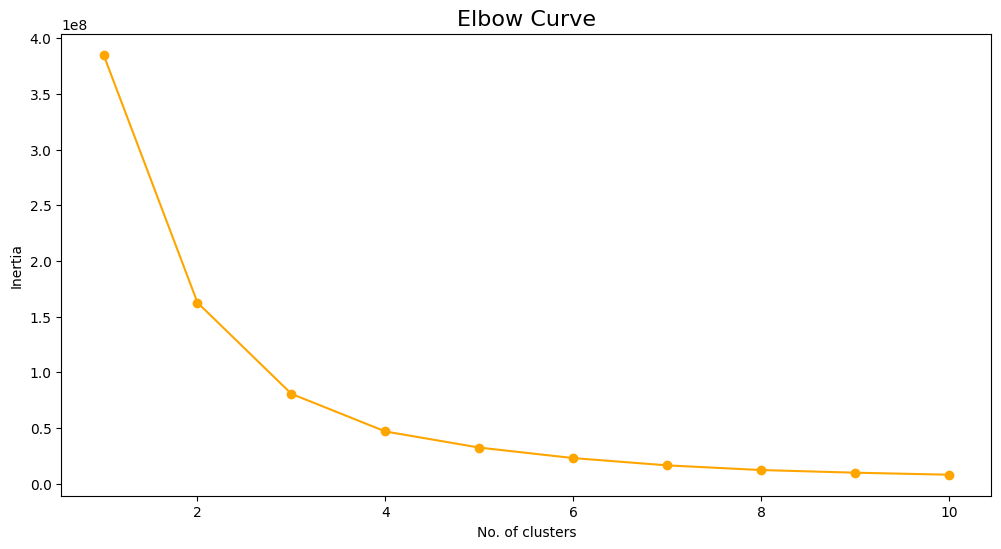

In [50]:
X = df.iloc[:, [1, 7]].values

find_clusters(X)

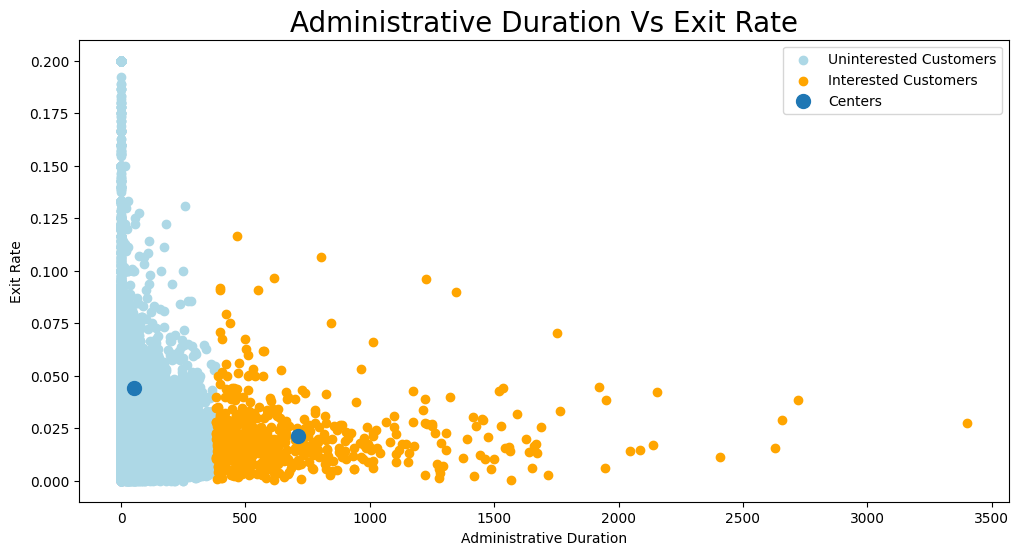

In [51]:
draw_optimal_clusters(X, n_clusters=2, xlabel="Administrative Duration",
                      ylabel="Exit Rate",
                      title="Administrative Duration Vs Exit Rate")

Recommendation and Insights


The conversion rates of new visitors are high compared to those of returning customers.

It's a good sign that 85% of visitors are returning to site. 15% of visitors are new. We can give offers to lure more new visitors.

While the number of returning customers to the website is high, the conversion rate is low compared to that of new customers.

65% of visitors come from browser only 1 and more than 85% of visitors come from browser 1 and 2. We can make website to more appealing, interactive and responsive to these browsers.

Approx 95% of visitors uses operating system 1, 2, or 3.

Region 1 accounts for more sales followed by region 3.

Month May and November have the highest visitors but only November month has more conversion rate.

Average spends on administrative, informational, and products related pages is more for those who bought something than those who nothing.

Average Bounce Rate and Exit Rate is lower when a product sales.

Pages with a high page value have a lower bounce rate. We should be talking with our tech team to find ways to improve the page value of the web pages.